In [330]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import os
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'


In [331]:
df = pd.read_csv(r'./data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [332]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [333]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [334]:
df['Age']

0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64

In [335]:
df['Spending Score (1-100)']

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

In [336]:
df.Age

0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64

In [337]:
df.columns = ['customerID', 'gender', 'age','income', 'score']

In [338]:
df

,customerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [339]:
df.describe()

,customerID,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [340]:
x=pd.DataFrame(df.score)

In [341]:
x

,score
0,39
1,81
2,6
3,77
4,40
...,...
195,79
196,28
197,74
198,18


In [342]:
y=pd.DataFrame(df.age)

In [343]:
y

,age
0,19
1,21
2,20
3,23
4,31
...,...
195,35
196,45
197,32
198,32


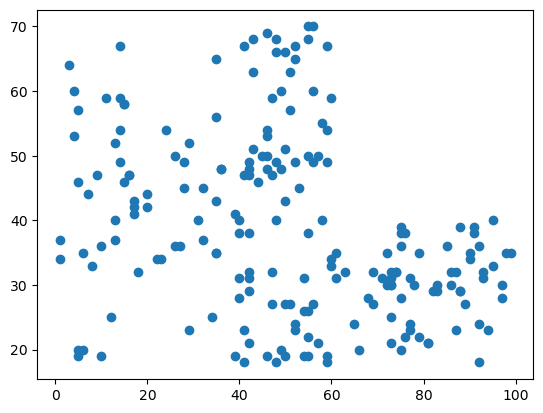

In [344]:
plt.scatter(x, y)

In [345]:
df.gender

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: gender, Length: 200, dtype: object

In [346]:
X = df[['income', 'score']]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


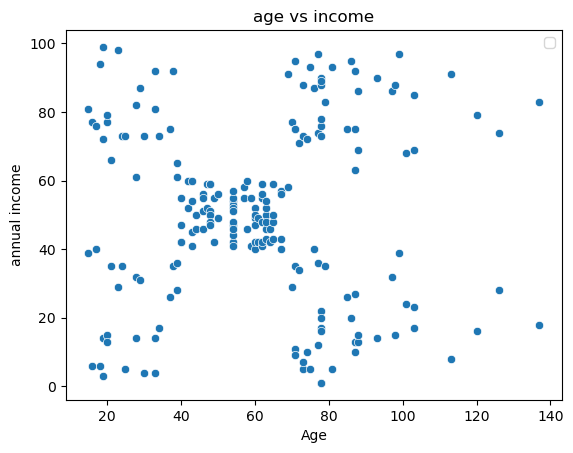

In [347]:
sns.scatterplot(X, x= "income", y= "score")
plt.xlabel('Age'), plt.ylabel('annual income') 
plt.title('age vs income')
plt.legend()
plt.show()

In [348]:
# Feature normalization
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)

In [349]:
n_cluster = 5
random_state = 42

kmeans = KMeans(n_clusters=n_cluster, init='k-means++', random_state=random_state)
kmeans.fit(X_scaled)

c:\Users\Utilisateur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Utilisateur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

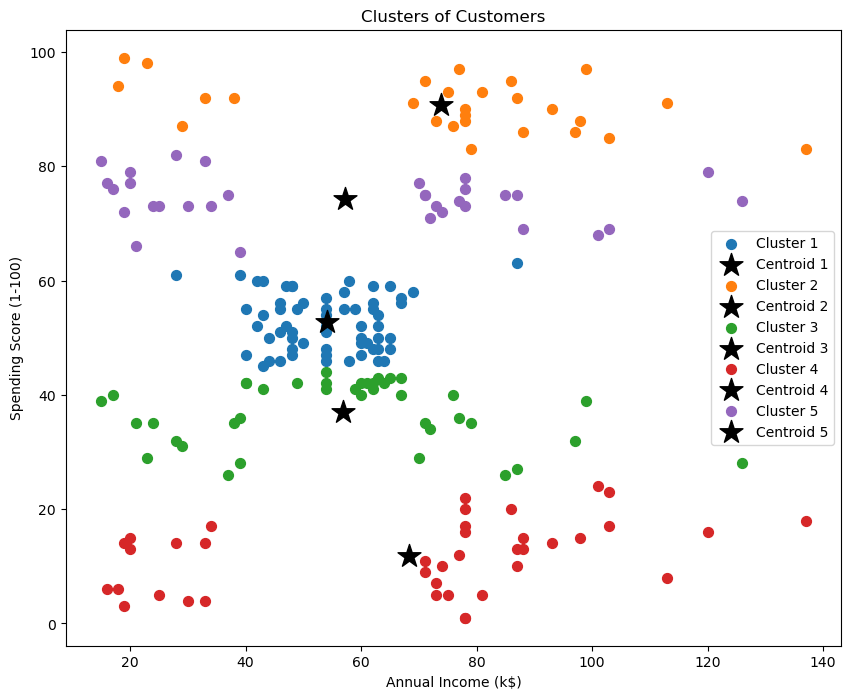

In [350]:
plt.figure(figsize=(10, 8))
for cluster_label in range(5):  # Loop through each cluster label
    cluster_points = X[kmeans.labels_ == cluster_label]
    centroid = cluster_points.mean(axis=0)  # Calculate the centroid as the mean position of the data points
    plt.scatter(cluster_points['income'], cluster_points['score'],
                s=50, label=f'Cluster {cluster_label + 1}')  # Plot points for the current cluster
    plt.scatter(centroid[0], centroid[1], s=300, c='black', marker='*', label=f'Centroid {cluster_label + 1}')  # Plot the centroid
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.savefig('plot_kmeans.png')
plt.show()


In [351]:
# import pickle
# pickle.dump(kmeans, open('model_kmeans', 'wb'))